In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
alpha = 1.5 # taux de reproduction des proies
beta = 0.05 # taux de mortalité des proies dû aux prédateurs rencontrés
gamma = 0.48 # taux de mortalité des prédateurs
delta = 0.05 # taux de reproduction des prédateurs en fonction des proies rencontrées et mangées

# Q1) Analyse de l'équation

alpha : taux de reproduction des proies  
beta : taux de mortalité des proies dû aux prédateurs rencontrés  
gamma : taux de mortalité des prédateurs  
delta : taux de reproduction des prédateurs en fonction des proies rencontrées et mangées

## Points d'équilibre 

Posons : 

$f:(x_1,x_2,t) \to (x_1(\alpha -\beta x_2 ),-x_2 (\gamma - \delta x_1))$. f est autonome donc nous n'écrirons plus t par la suite.

Les points d'équilibres sont tel que : 
$f(x_1^{eq},x_2^{eq}) = (0,0)$
Ce qui laisse les possibilités : 
$(x_1^{eq},x_2^{eq}) = (0,0)  \,\,\, ou \,\,\, (x_1^{eq},x_2^{eq}) = ( \frac{\gamma}{\delta }, \frac{\alpha}{\beta })$

### Stabilité: 

On calcul la jabobienne de f : 
$J_f(x1,x2) = \begin{pmatrix} \alpha - \beta x_2 
 & -\beta x_1\\ \delta x_2
 & -\gamma + \delta x_1
\end{pmatrix}$

Alors : $J_f(0,0) = \begin{pmatrix} \alpha 
 & 0\\ 0
 & -\gamma
\end{pmatrix}$, les valeurs propres sont $\alpha>0 \,\,\, et \,\,\, -\gamma<0$
Donc le point d'équilibre (0,0) est instable car $\alpha>0$.

De plus on a : $$J_f(\frac{\gamma}{\delta },\frac{\alpha}{\beta }) = \begin{pmatrix} 0
 & - \frac{\beta\gamma}{\delta } \\ \frac{\delta\alpha}{\beta }
 & 0 
\end{pmatrix}$$
Le polynôme caractéristique correspondant à la matrice est : 

$\chi(x) = x^2 + \alpha\gamma $
De valeurs propres : $+/- i\sqrt{\alpha\gamma}$

La partie réelle des valeurs propres étant 0, on ne peut pas conclure quant à la stabilité de ce point d'équilibre.

# Q2) Représentation visuelle du champ de vecteurs

In [3]:
X=np.linspace(0,60,20)
Y=np.linspace(0,60,20)
Mesh = np.meshgrid(X,Y)
MX=Mesh[0]
MY=Mesh[1]

VX = MX*(alpha-beta*MY)
VY = -MY*(gamma - delta*MX)

Text(0, 0.5, 'Y')

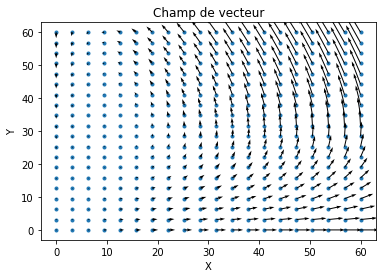

In [4]:
plt.scatter(MX,MY,marker='.')
plt.quiver(MX,MY,VX,VY)
plt.title("Champ de vecteur")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Y')

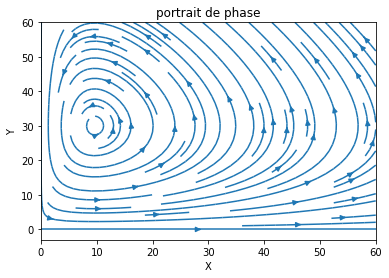

In [5]:
plt.streamplot(MX,MY,VX,VY)
plt.title("portrait de phase")
plt.xlabel("X")
plt.ylabel("Y")

Les trajectoires du portrait de phase sont fermées et entourent le point d'équilibre, ainsi les solutions vont osciller autour de ce dernier point.

# Q3)

La fonction f définie à la question 1 est continue sur $\mathbb{R}^2$ car ses composantes sont continues et elle est même continuement différentiable sur $\mathbb{R}^2$ car sa jacobienne $J_f(x1,x2) = \begin{pmatrix} \alpha - \beta x_2 
 & -\beta x_1\\ \delta x_2
 & -\gamma + \delta x_1
\end{pmatrix}$ existe et est continue sur $\mathbb{R}^2$ car ses composantes sont des fonctions polynomiales de plusieurs variables.

Alors d'après le théorème de Cauchy-Lipschitz, pour tout $(t_0,x_{10},x_{20}) \in \mathbb{R}^2$, il existe une unique solution maximale $(x_1,x_2)$ passant par ce point.

On considère alors l'unique solution maximale initialisée par $(t_0,x_{10},x_{20}) \in \mathbb{R}^{+*} \times \mathbb{R}^{+*} $ continue et non constante (car sinon elle reste bien dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ ) noté $(x_1,x_2)$. 

Si une des deux composantes devient négative ou nulle à un moment $t_1$ donné, comme $x_1$ et $x_2$ sont continuent, elles doivent passer par 0 (théorème des valeurs intermédiaires). Supposons que notre solution passe aussi par le point $(t_1,a,0)$ où a est réel.

Or, si on prend une solution maximale de la forme $(x'_1,0)$ passant par $(t_1,a,0)$ (condition initiale), qui existe bien car dans ce cas $x'_1$ est une exponentielle, et grâce à la constante devant on peut prendre toutes les valeurs positives strictement. On pourrait faire de même avec la première coordonnée.    
Par unicité des solutions on aurait donc $(x'_1,0) = (x_1,x_2)$ or $x_{20}>0$ n'est jamais atteint pour une telle solution donc finalement les composantes d'une solution $(x_1,x_2)$ ne s'annulent jamais et sont toujours strictements positivent sur $\mathbb{R}^+$.

# Q4) 

Pour une solution $(x_1,x_2)$ initialisée dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*} $, on a : $\nabla H^T = (\delta -\frac{\gamma}{x_1},  \beta - \frac{\alpha}{x_2})$

Et donc pour $t \in \mathbb{R}$: $\frac{dH}{dt}(t) = \nabla H^T (x_1,x_2)*\left(\begin{array}xx_1'\\x_2'\end{array}\right) = (\delta -\frac{\gamma}{x_1} \beta - \frac{\alpha}{x_2})*\left(\begin{array}xx_1(\alpha - \beta x_2)\\-x_2(\gamma-\delta x_1)\end{array}\right)$

donc $\frac{dH}{dt}(t) = \delta *x_1(\alpha - \beta x_2) -\gamma *(\alpha - \beta x_2) -\beta *x_2(\gamma-\delta x_1) +\alpha *(\gamma-\delta x_1) = 0$

H est donc une fonction constante du temps égale à $C \in \mathbb{R}^+$.

On peut alors montrer que une solution maximale  $(x_1,x_2)$ est bornée sur son ensemble de définition : 

- $\delta x_1 - \gamma ln(x_1) = C - (\beta x_2 +\alpha ln(x_2))$ 

- Par croissance comparée, $\lim\limits_{x_1 \rightarrow +\infty} \delta x_1 - \gamma ln(x_1) = +\infty$ donc il existe $h_1>0$ tel que pour tout $x_1>h_1$,  $\delta x_1 - \gamma ln(x_1)>0$. De même il exite $h_2>0$ tel que pour tout $x_2>h_2$,  $\beta x_2 - \alpha ln(x_2)>0$.
- Donc pour $(x_1,x_2) \in ]h_1,+\infty[\times ]h_2,+\infty[$, $H(x_1,x_2)=C > \delta x_1 + \beta x_2$ d'où $\frac{C}{\delta} > x_1$ et $\frac{C}{\beta} > x_2$ 
- Donc $0< x_1 < max(h_1,\frac{C}{\delta})$ et $0< x_2 < max(h_2,\frac{C}{\beta})$. La solution est bien bornée sur son ensemble de définition.

Supposons que la solution (unique) maximale $(x_1,x_2)$ est défini sur un intervalle du type $]a,b[$ où a et b sont finis. Alors d'après le théorème de domaine maximal d'existence, f étant continue d'après la question 1, on a soit $\lim\limits_{x \rightarrow a} \|(x_1,x_2)| = +\infty$, $\lim\limits_{x \rightarrow b} \|(x_1,x_2)| = +\infty$ ce qui est impossible car la solution est bornée, soit (t,x) tend vers la frontiere de l'ensemble qui est $\mathbb{R}$ donc la solution est définie sur $\mathbb{R}$.



# Q5) Représentation des courbes de niveau de H

In [6]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [7]:
def H(x1, x2) :
    return( delta*x1 - gamma* np.log(x1)+beta*x2 - alpha* np.log (x2))

<ipython-input-7-2ff7d49f9ff6>:2: RuntimeWarning: divide by zero encountered in log
  return( delta*x1 - gamma* np.log(x1)+beta*x2 - alpha* np.log (x2))


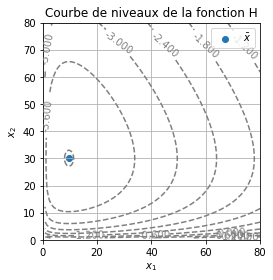

In [8]:
display_contour(
    H, 
    x=np.linspace(0, 80, 100), 
    y=np.linspace(0, 80, 100), 
    levels=10 
)
xb= (gamma/delta, alpha/beta)

plt.scatter(xb[0],xb[1],label=r'$\bar{x}$');
plt.title("Courbe de niveaux de la fonction H")
plt.legend()

On remarque alors que le point $\bar{x}$ se situe au centre des courbes de niveau, c'est donc un extrémum de la fonction H. De plus les lignes de niveaux sont décroissante, ainsi le point $\bar{x}$ est un minimum pour H.   
Graphiquement, le point $\bar{x}$ est donc stable car les courbes de niveau permettent de caractériser les solution du système, et elle sont fermées et bornées autour de ce dernier. Ainsi,  les solutions restent arbitrairement proche de $\bar{x}$ quand elles sont initialisées suffisamment proche de $\bar{x}$.   

remarque : on peut le prouver en exploitant la fonction de Lyapunov V(x) = H(x) -H($\bar{x}$)

# Q6) Fonction Euler explicite

## Intégration

In [9]:
def solve_euler_explicite(f,x0,dt,t0,tf) :
    t_list , x_list = [t0], [x0] 
    t, x = t0, x0 
    while t <= tf:
        x = x + dt*f(t,x)
        x_list.append(x)
        t += dt
        t_list.append(t)
    return t_list , np.array(x_list)

## Test sur une equation connue

Text(0, 0.5, 'x')

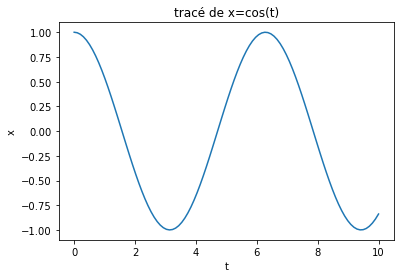

In [10]:
T=np.linspace(0,10,100)
X=np.cos(T)
plt.plot(T,X)
plt.title("tracé de x=cos(t)")
plt.xlabel("t")
plt.ylabel("x")

Système différentiel à résoudre : 
$\left\{\begin{matrix}
\frac{dx^2}{dt^2} + x =0\\ x(0)=1
\\\frac{dx}{dt}(0) = 0
\end{matrix}\right.$

On a alors : $f(x_1,x_2) = \begin{pmatrix} x_2
\\ -x_1 
\end{pmatrix}$  

In [11]:
def f(t,X):
    return(np.array([X[1],-X[0]]))

dt=10**(-4)

temps, Y=solve_euler_explicite(f,[1,0],dt,0,10)
tempsP, YP = solve_euler_explicite(f,[1,0],0.1,0,10)
tempsPP, YPP = solve_euler_explicite(f,[1,0],0.01,0,10)

YE=[Y[i,0] for i in range(0,len(Y)) ] # On récupère la fonction y(t)
YEP=[YP[i,0] for i in range(0,len(YP)) ]
YEPP=[YPP[i,0] for i in range(0,len(YPP)) ]

Text(0.5, 0, 't')

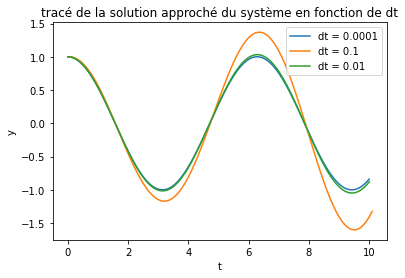

In [12]:
plt.plot(temps,YE,label='dt = 0.0001')
plt.plot(tempsP,YEP, label = 'dt = 0.1')
plt.plot(tempsPP,YEPP, label = 'dt = 0.01')
plt.title("tracé de la solution approché du système en fonction de dt")
plt.legend()
plt.ylabel("y")
plt.xlabel("t")

On observe bien la convergence de la solution approchée avec dt qui se réduit. 

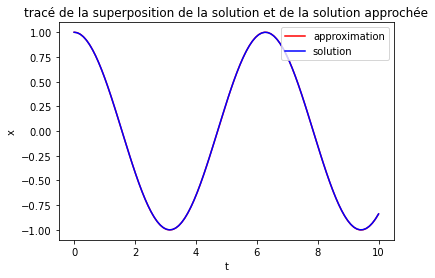

In [13]:
plt.plot(temps,YE, c='r',label='approximation')
plt.plot(T,X,c='b',label='solution')
plt.title("tracé de la superposition de la solution et de la solution approchée")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()

## Ordre de convergence de la méthode : 

In [14]:
DT = np.arange(10**(-3),10**(-1),10**(-3)/2)

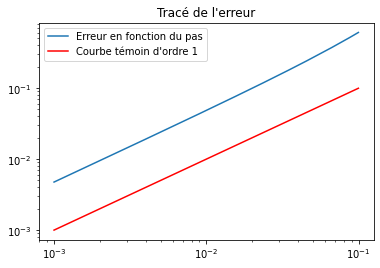

In [15]:
ERR=[]
for dt in DT :
    temps, Y=solve_euler_explicite(f,[1,0],dt,0,10)
    YE=[Y[i,0] for i in range(0,len(Y)) ] # on extrait x(t)
    
    Eps = max(abs(np.cos(temps) - YE)) # erreur max commise : max|cos(t) - x(t)|
    ERR.append(Eps)
    
plt.loglog(DT,ERR,label = 'Erreur en fonction du pas')
plt.loglog(DT,DT,color='r',label ="Courbe témoin d'ordre 1") 
plt.title("Tracé de l'erreur")
plt.legend()

La méthodes est stable lorsque dt tend vers 0 car la solution ne diverge pas d'après le tracé de la solution.
La methode est consistante d'ordre 1 puisque l'erreur en fonction du pas semble être linéaire donc nous pouvons la majorer par une fonction linéaire.
Donc la méthode semble être convergente d'ordre 1 d'après la condition suffisante de convergence.



# Q7) Euler explicite pour les équations de Lotka-Volterra 

### Résolution

In [16]:
def f_Lotka(t,X):
    return(np.array([X[0]*(alpha-beta*X[1]),
                     -X[1]*(gamma-delta*X[0])]))

In [17]:
dt=10**-4

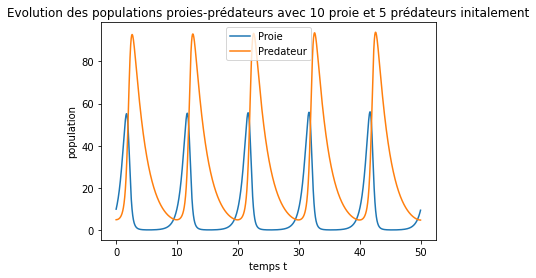

In [30]:
temps, Y_Lotka = solve_euler_explicite(f_Lotka,[10,5],dt,0,50)
Proie = [Y_Lotka[i,0] for i in range(0,len(Y_Lotka))]
Predateur = [Y_Lotka[i,1] for i in range(0,len(Y_Lotka))]


#représentation graphique
plt.plot(temps,Proie,label='Proie')
plt.plot(temps,Predateur,label='Predateur')
plt.title("Evolution des populations proies-prédateurs avec 10 proie et 5 prédateurs initalement")
plt.xlabel("temps t")
plt.ylabel("population")
plt.legend(loc='best')

On remarque qu'au temps courts un motif périodique apparait, cette solution peut tout à fait correspondre à la réalité. Néanmoins au temps très long, le motif périodique est modifié et les deux population max tendent à croitre, ce qui n'est pas voulu car H devrait être conservé.

### Tracé de la fonction H

Text(0.5, 1.0, 'tracé de la fonction H')

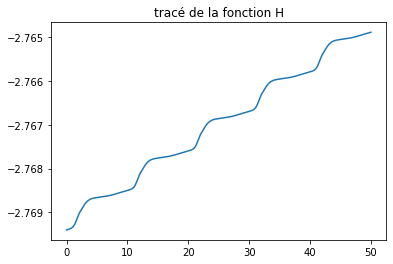

In [19]:
H_Lotka = H(np.array(Proie),np.array(Predateur))
plt.plot(temps,H_Lotka)
plt.title("tracé de la fonction H")

D'après la question 4), la fonction H doit être constante. D'après le graphique ci-dessus, elle n'est clairement pas constante. cela est probablement due aux approximations et erreurs de la méthode d'Euler. Cette augmentation est traduite par l'augmentation des deux populations maximales (cf graph précédent).




# Q8 Euler implicite

## Intégration : 

In [20]:
def point_Fixe_f(f,x,t,dt,eps = 0.05) :
    Y0 = x + dt * f(t,x)
    Y=Y0
    while np.linalg.norm((x + dt*f(t+dt,Y) -Y)) > eps*np.linalg.norm(Y0) :
        Y = x + dt*f(t+dt,Y)
    return(Y)

def solve_euler_implicit(f,x0,dt,t0,tf,itermax =10000) : 
    t_list , x_list = [t0], [x0] 
    t, x = t0, x0 
    itera = 0
    while t+dt <= tf and itera<=itermax:
        x = point_Fixe_f(f,x_list[-1],t,dt)
        x_list.append(x)
        t += dt
        t_list.append(t)
        itera+=1
    return t_list , np.array(x_list)

## Test sur une solution connue : x=cos(t)

Text(0.5, 1.0, 'tracé de la solution approché du système')

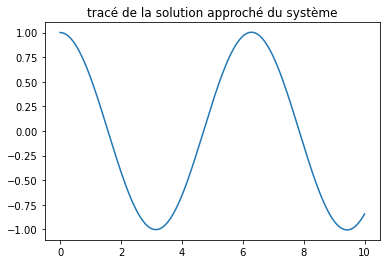

In [21]:
dt = 10**-3
temps,Z = solve_euler_implicit(f,[1,0],dt,0,10,1000000)
Y=[Z[i,0] for i in range(0,len(Z))]
plt.plot(temps,Y)
plt.title("tracé de la solution approché du système")

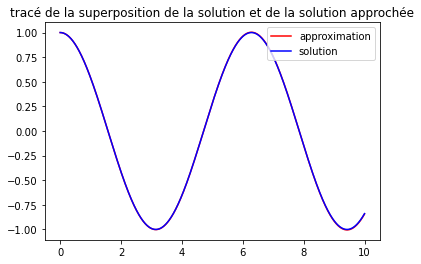

In [22]:
plt.plot(temps,Y, c='r',label='approximation')
plt.plot(temps,np.cos(temps),c='b',label='solution')
plt.title("tracé de la superposition de la solution et de la solution approchée")
plt.legend()

## Sur les équations de Lotka-Volterra

### Résolution : 

In [23]:
dt=10**-3

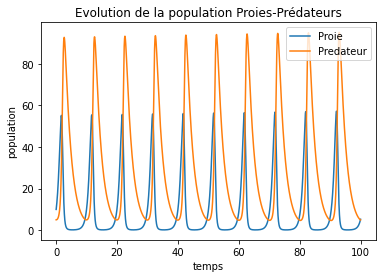

In [24]:
temps, Z_Lotka_imp = solve_euler_implicit(f_Lotka,[10,5],dt,0,100,1000000)
Proie_imp = [Z_Lotka_imp[i,0] for i in range(0,len(Z_Lotka_imp))]
Predateur_imp = [Z_Lotka_imp[i,1] for i in range(0,len(Z_Lotka_imp))]

plt.plot(temps,Proie_imp,label='Proie')
plt.plot(temps,Predateur_imp,label='Predateur')
plt.title("Evolution de la population Proies-Prédateurs")
plt.xlabel("temps")
plt.ylabel("population")
plt.legend()

On observe ici aussi un le même phénomène que pour euler explicite, les populations maximales augmentent.

### Fonction H : 

Text(0.5, 1.0, 'tracé de la fonction H')

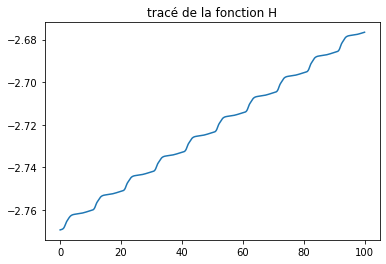

In [25]:
P=H(np.array(Proie_imp),np.array(Predateur_imp))

plt.plot(temps,P)
plt.title("tracé de la fonction H")

On observe ici la même tendance que pour Euler explicite: H n'est pas constante tout à fait.

# Q9)

On sait que : $H(x) = H(x(0)) = H_0$  car $\frac{dH(x(t))}{dt} = 0$ et donc $H(x_1,x_2)-H_0 = 0$   
Ainsi :    
$\begin{pmatrix} x_1(\alpha -\beta x_2 )
\\ -x_2 (\gamma - \delta x_1)
\end{pmatrix} \Leftrightarrow
\begin{pmatrix} x_1(\alpha -\beta x_2 ) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)
\\ -x_2 (\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0)
\end{pmatrix}
$
  
  
Les solutions de : 
$
\begin{pmatrix}
x'_1\\ x'_2
\end{pmatrix} =
\begin{pmatrix} x_1(\alpha -\beta x_2 ) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)
\\ -x_2 (\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0)
\end{pmatrix}$

Sont donc identifques à celles de Lotka-Voleterra, pour tout choix de u de $\mathbb{R}^2 \rightarrow \mathbb{R}^2$, continûement différentiable 

# Q10)

On peut calculer la dérivée de $H_0 - H$ le long des solutions de ce nouveau système :
   
$
\frac{d(H-H_0)}{dt} =\frac{dH}{dt} = \nabla H^T (x_1,x_2)*\left(\begin{array}xx_1'\\x_2'\end{array}\right) $

$\frac{d(H-H_0)}{dt} = (\delta -\frac{\gamma}{x_1}, \beta - \frac{\alpha}{x_2})*\left(\begin{array}xx_1(\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0) \\-x_2(\gamma-\delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0)\end{array}\right)$    
Ainsi : 
$\frac{d(H-H_0)}{dt} = -(\delta -\frac{\gamma}{x_1})(u_1(H-H_0)) -(\beta - \frac{\alpha}{x_2})(u_2(H-H_0))$

Finalement en posant :  $u = k\nabla H$     
     
On a bien : $\frac{d(H-H_0)}{dt} = -k\left \| \nabla H \right \|^2(H(x(t))-H_0)$    
        
    
Supposons alors que $x$ reste à une distance strictement positive de $\bar{x}$, c'est à dire : $\left | x_1-\bar{x}_1 \right | \geq c_1$ et $\left | x_2-\bar{x}_2 \right | \geq c_2$ Où $c_1$ et $c_2$ sont positifs avec au moins l'un des deux  nul.
     
On a ainsi $\left \| \nabla H \right \|^2 = \frac{\delta^2(x_1-\bar{x}_1)^2}{x_1^2} + \frac{\beta^2(x_2-\bar{x}_2)^2)}{x_2^2} \geq \frac{c_1^2\delta^2}{x_1^2} + \frac{c_2^2\beta^2}{x_2^2}$      
De plus, on a déjà montré qu'une solution $x=(x_1,x_2)$ était bornée, donc il existe m et n tel que : $\frac{1}{x_1^2} \geq \frac{1}{m}$ et $\frac{1}{x_2^2} \geq \frac{1}{n}$     
Finalement, $\left \| \nabla H \right \|^2 \geq \frac{c_1^2\delta^2}{m} + \frac{c_2^2\beta^2}{n} = c > 0$
    
On a ainsi : $\frac{d(H-H_0)}{dt} \leq -kc(H(x(t))-H_0)$ donc $\frac{d(H-H_0)}{H-H_0 } \leq  -kcdt$ (ici on suppose $H(t_u)-H_0 \ne 0$, car même si il existe un $t_u$ tel que $H(t_u)-H_0 =0$, alors en ce point la convergence exponentielle est trivialement vérifiée )      
     
Par croissance de l'intégrale : $\int_{t_i}^{t} \frac{d(H-H_0)}{H-H_0 } \leq  \int_{t_i}^{t} -kcdt$, donc $ln(|\frac{H(t)-H_0}{H(t_i)-H_0}|) \leq -kc(t-t_i)$    
   
D'où : $|H(t)-H_0| \leq  |H(t_i)-H_0|exp(-kc(t-t_i))$       
     
Ainsi $H$ converge exponentiellement vers $H_0$

# Q11)

k représente la vitesse de convergence de $H$ vers $H_0$

On redéfini une fonction prenant en compte le nouveau système d'équation :

In [26]:
def f2(t,X,H0,k) :
    return (np.array([X[0]*(alpha-beta*X[1]) - k*(delta - gamma/X[0])*(H(X[0],X[1]) - H0),
                     -X[1]*(gamma-delta*X[0]) - k*(beta - alpha/X[1])*(H(X[0],X[1]) - H0)]))
    

On redéfini ainsi la fonction euler explicite, prenant en compte $H_0$ et $k$.

In [27]:
def solve_euler_explicite2(f,x0,dt,t0,tf,H0,k) :
    t_list , x_list = [t0], [x0] 
    t, x = t0, x0 
    while t <= tf:
        x = x + dt*f(t,x,H0,k)
        x_list.append(x)
        t += dt
        t_list.append(t)
    return t_list , np.array(x_list)

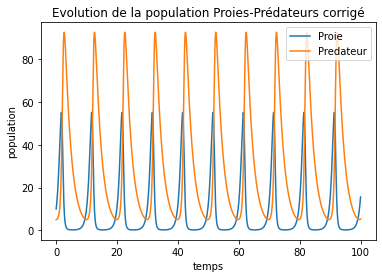

In [28]:
k=10
temps2, Z_Lotka_exp2 = solve_euler_explicite2(f2,[10,5],dt,0,100,H(10,5),k)
Proie_exp2 = [Z_Lotka_exp2[i,0] for i in range(0,len(Z_Lotka_exp2))]
Predateur_exp2 = [Z_Lotka_exp2[i,1] for i in range(0,len(Z_Lotka_exp2))]

#Graphique :
plt.plot(temps2,Proie_exp2,label='Proie')
plt.plot(temps2,Predateur_exp2,label='Predateur')
plt.title("Evolution de la population Proies-Prédateurs corrigé")
plt.xlabel("temps")
plt.ylabel("population")
plt.legend()

Text(0.5, 1.0, 'tracé de la fonction H corrigé')

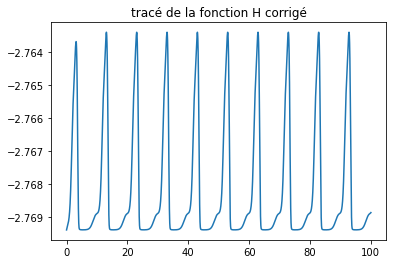

In [29]:
P2=H(np.array(Proie_exp2),np.array(Predateur_exp2))

plt.plot(temps2,P2)
plt.title("tracé de la fonction H corrigé")

On observe cette fois ci que la fonction H n'est plus globalement croissante, et oscille autour d'une valeur moyenne, ainsi on n'a plus l'augmentation des populations maximales.

On a : $H(x^{j+1}) = H(x^{j} + dt.f(x^{j})) \approx H(x^j) + dt \frac{\partial H}{\partial x_1}f_1(x^j) +dt \frac{\partial H}{\partial x_2}f_2(x^j) = H(x^j) + dt\frac{dH(x^j)}{dt} = H(x^j) - k||\nabla H(x^{j})||^2(H(x^j)-H_0)dt$

$H(x^{j+1}) - H_0 \approx (H(x^{j})-H_0).(1-kdt||\nabla H(x^{j})||^2)$

On remarque ici que un facteur $k.dt$ apparait, ainsi si l'on prend $k$ trop grand, il se peut que deuxième facteur devienne prépondérant à cause des approximations de calculs et donc cela fausserait l'évolution de $H$ 